In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'serif'


In [3]:
fa_covariates = pd.read_csv('../data/data_fa21/all_students_features_T_e=7_finalized.csv', index_col = 0)
sp_covariates = pd.read_csv('../data/data_sp22/all_students_features_T_e=7_finalized.csv', index_col = 0)

In [5]:
def q90(x):
    return x.quantile(0.9)

def q10(x):
    return x.quantile(0.1)

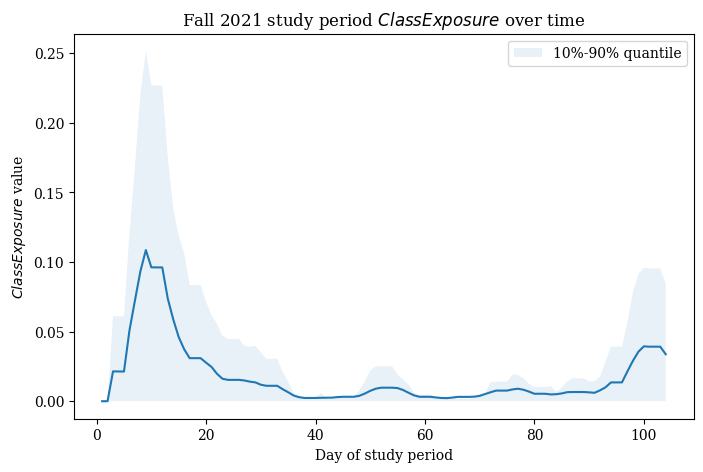

In [14]:
plt.figure(figsize = (8, 5))

fa_cp = fa_covariates.groupby(["day_idx"]).aggregate({"class_positivity":["mean","sem",q10,q90]})
plt.plot(
    # fa_cp.index, 
    list(range(1, 105)),
    fa_cp[("class_positivity","mean")].values, 
    # label="whole population"
)
plt.fill_between(
    # fa_cp.index,
    list(range(1, 105)),
    y1 = fa_cp[("class_positivity","q10")].values,
    y2 = fa_cp[("class_positivity","q90")].values,
    alpha=0.1,
    label="10%-90% quantile"
)


# plt.xticks(plt.gca().get_xticks()[::14], rotation=30)
plt.xlabel("Day of study period")
plt.ylabel("$\it{ClassExposure}$ value")
plt.title("Fall 2021 study period $\it{ClassExposure}$ over time")
plt.legend()

plt.savefig("../plots/classexposure_fa21.pdf", bbox_inches='tight')

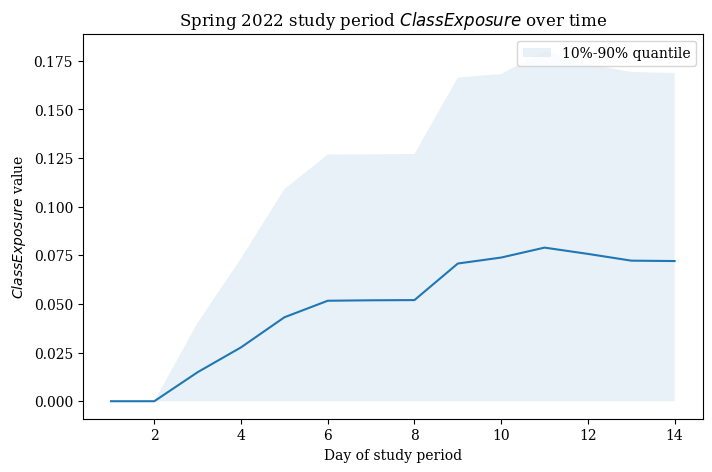

In [15]:
plt.rcParams["font.family"] = 'serif'

plt.figure(figsize = (8, 5))

sp_cp = sp_covariates.groupby(["day_idx"]).aggregate({"class_positivity":["mean","sem",q10,q90]})
plt.plot(
    # sp_cp.index, 
    list(range(1,15)),
    sp_cp[("class_positivity","mean")].values, 
    # label="whole population"
)
plt.fill_between(
    # sp_cp.index,
    list(range(1,15)),
    y1 = sp_cp[("class_positivity","q10")].values,
    y2 = sp_cp[("class_positivity","q90")].values,
    alpha=0.1,
    label="10%-90% quantile"
)

plt.legend()
# plt.xticks(plt.gca().get_xticks()[::7])
plt.xlabel("Day of study period")
plt.ylabel("$\it{ClassExposure}$ value")
plt.title("Spring 2022 study period $\it{ClassExposure}$ over time")

plt.savefig("../plots/classexposure_sp22.pdf")